In [52]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import importlib

In [2]:
import ensembles

importlib.reload(ensembles)

<module 'ensembles' from 'C:\\Users\\Vladimir\\PycharmProjects\\House_sales\\experiments\\ensembles\\__init__.py'>

In [3]:
data = pd.read_csv('kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
y = data.price.to_numpy()
X = data.drop(columns=['price'])

X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Преобразуем поле date в формат даты

In [5]:
X['date'] = pd.to_datetime(X.date.apply(lambda s: f"{s[0:4]}-{s[4:6]}-{s[6:8]}"))

X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Исключим суррогатный ключ id из признакового описания

In [6]:
X.drop(columns='id', inplace=True)

X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


_sqft\_living_ --- жилая площадь (в квадратных футах)
_sqft\_lot_ --- площадь участка (в квадратных футах)
_waterfront_ --- дом у набережной или дом у озера, реки
_sqft\_living15_ --- средняя жилая площадь у ближайших 15 домов
_sqft\_lot15_ --- средняя площадь участка и ближайших 15 домов

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42, shuffle=True)

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")

X_train.shape=(4322, 19)
X_test.shape=(17291, 19)


In [8]:
set(X.bedrooms)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}

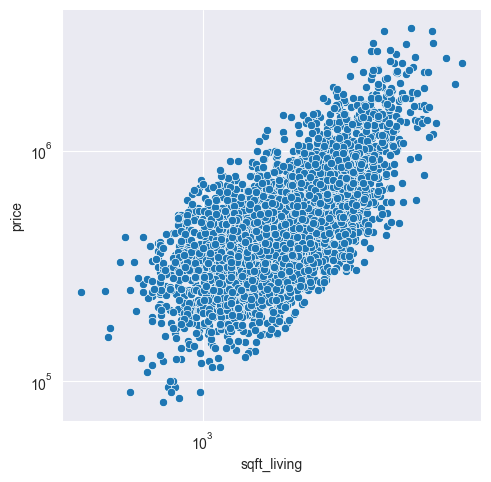

In [23]:
(sns.relplot(
    data=pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['price'])], axis=1),
    x='sqft_living',
    y='price'
)
 .set(xscale='log')
 .set(yscale='log'))

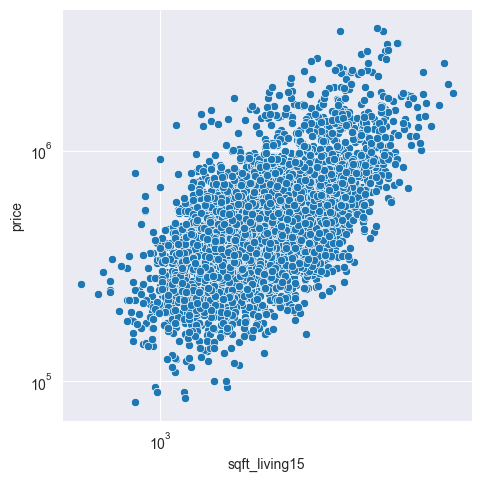

In [24]:
(sns.relplot(
    data=pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['price'])], axis=1),
    x='sqft_living15',
    y='price'
)
 .set(xscale='log')
 .set(yscale='log'))

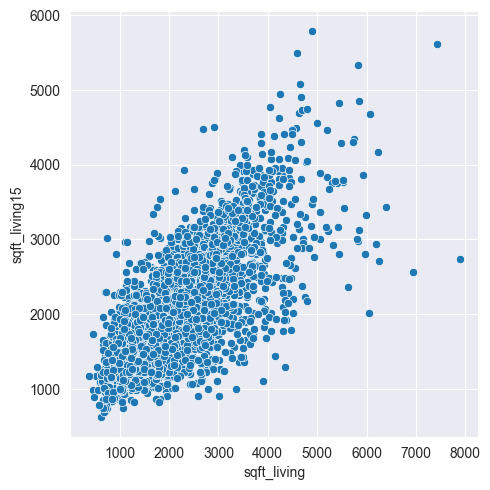

In [26]:
(sns.relplot(
    data=pd.concat([X_train.reset_index(drop=True), pd.DataFrame(y_train, columns=['price'])], axis=1),
    x='sqft_living',
    y='sqft_living15'
)
 .set(xscale='linear')
 .set(yscale='linear'))

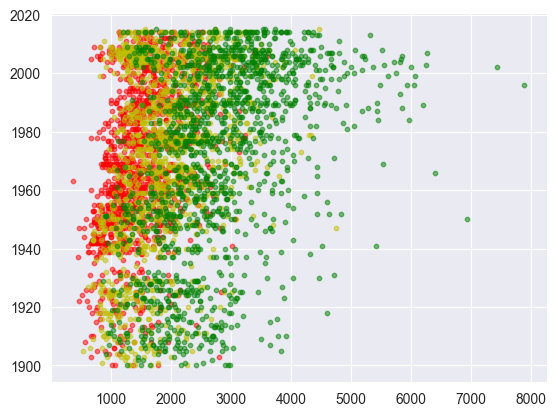

In [50]:
_, ax = plt.subplots()

quantiles = np.quantile(y_train, [0.33, 0.66])

feat_1 = 'sqft_living'
feat_2 = 'yr_built'

ax.scatter(X_train.loc[y_train < quantiles[0], feat_1], X_train.loc[y_train < quantiles[0], feat_2], c='r', alpha=0.5, s=10)
ax.scatter(X_train.loc[(y_train >= quantiles[0]) & (y_train < quantiles[1]), feat_1], X_train.loc[(y_train >= quantiles[0]) & (y_train < quantiles[1]), feat_2], c='y', alpha=0.5, s=10)
ax.scatter(X_train.loc[y_train >= quantiles[1], feat_1], X_train.loc[y_train >= quantiles[1], feat_2], c='g', alpha=0.5, s=10)

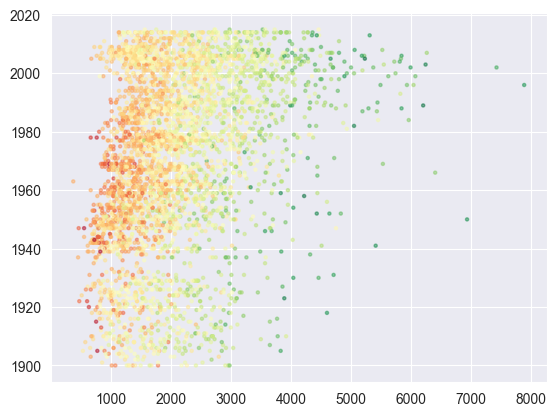

In [58]:
_, ax = plt.subplots()

ax.scatter(X_train[feat_1], X_train[feat_2], c=np.log(y_train), cmap=plt.get_cmap('RdYlGn'), s=5, alpha=0.5)